In [1]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, show, save, ColumnDataSource
from bokeh.models import ColumnDataSource, LabelSet, Label,HoverTool,LinearColorMapper,ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.models import LogColorMapper, LogTicker, ColorBar
from bokeh.layouts import row

from bokeh.models import FixedTicker,FuncTickFormatter,NumeralTickFormatter,PrintfTickFormatter, BasicTicker,LinearColorMapper

In [3]:
trainlines = gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='railway')

In [4]:
clyde = gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='river')

In [5]:
#stations  contains schematics geometry and calculated price
stations = gpd.read_file(r'd:\viz\trainlines\derived\New folder\station_price.gpkg', layer='price_dz_points')

In [6]:
station_labels =gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='railstation_labels')

In [7]:
stations['mean'] = pd.to_numeric(stations['mean']).round()

In [8]:
station_labels['name'] = station_labels['name'].str.upper()

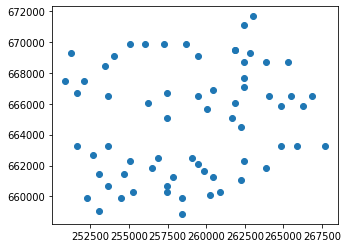

In [9]:
station_labels.plot()

In [10]:
#print('Stations : ', station_labels.crs)

In [11]:
subway  = gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='subway')

In [12]:
subway_labels  = gpd.read_file(r'D:\viz\trainlines\viz_layers.gpkg', layer='subway_lables')

In [13]:
subway_labels['name'] = subway_labels['name'].str.upper()

In [14]:
# update CRS for all layers (as shp were in BNG )
trainlines.crs = {'init' :'epsg:27700'} 
print('Trainlines: ', trainlines.crs)

#stations.crs = {'init' :'epsg:27700'} 
print('Stations : ', stations.crs)

#subway.crs = {'init' :'epsg:27700'}  
print('Subway : ',subway.crs)
subway_labels.crs= {'init' :'epsg:27700'} 
print('Subway labels: ',subway_labels.crs)

#clyde.crs= {'init' :'epsg:27700'} 
print('Clyde : ', clyde.crs)


Trainlines:  {'init': 'epsg:27700'}
Stations :  {'init': 'epsg:27700'}
Subway :  {'init': 'epsg:27700'}
Subway labels:  {'init': 'epsg:27700'}
Clyde :  {'init': 'epsg:27700'}


In [15]:
tsource = ColumnDataSource(trainlines)
stsource = ColumnDataSource(stations)
ssource = ColumnDataSource(subway)
slsource = ColumnDataSource(subway_labels)
stlsource = ColumnDataSource(station_labels)

In [16]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [17]:
def getLineCoords(row, geom, coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

In [18]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

**Let’s now apply the functions that we have created and parse the x and y coordinates for all of our datasets.**

In [19]:
# Get the Polygon x and y coordinates
#grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
#grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
trainlines['x'] = trainlines.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
trainlines['y'] = trainlines.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)


clyde['x'] = clyde.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
clyde['y'] = clyde.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

In [20]:
# Calculate x and y coordinates of the points
subway['x'] = subway.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
subway['y'] = subway.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

subway_labels['x'] = subway_labels.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
subway_labels['y'] = subway_labels.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

stations['x'] = stations.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
stations['y'] = stations.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

station_labels['x'] = station_labels.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
station_labels['y'] = station_labels.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

**Let’s now convert our GeoDataFrames into Bokeh ColumnDataSources (without geometry columns)**

In [21]:
# Make a copy, drop the geometry column and create ColumnDataSource
tr_df = trainlines.drop('geometry', axis=1).copy()
trsource = ColumnDataSource(tr_df)

# Make a copy, drop the geometry column and create ColumnDataSource
cl_df = clyde.drop('geometry', axis=1).copy()
clsource = ColumnDataSource(cl_df)


# Make a copy, drop the geometry column and create ColumnDataSource
s_df = subway.drop('geometry', axis=1).copy()
ssource = ColumnDataSource(s_df)

# Make a copy, drop the geometry column and create ColumnDataSource
sl_df = subway_labels.drop('geometry', axis=1).copy()
slsource = ColumnDataSource(sl_df)


# Make a copy, drop the geometry column and create ColumnDataSource
st_df = stations.drop('geometry', axis=1).copy()
stsource = ColumnDataSource(st_df)

In [22]:
# Make a copy, drop the geometry column and create ColumnDataSource
stl_df = station_labels.drop('geometry', axis=1).copy()
stlsource = ColumnDataSource(stl_df)

In [23]:
#stsource = ColumnDataSource(st_df)
#stsource.data.keys()

## Data visualising

In [24]:
# Initialize our figure
#p = figure(title="Stations Glasgow",sizing_mode='scale_width')

p = figure(plot_width=1200, plot_height=950, title = "Stations Glasgow")

In [25]:
# Add clyde on top of the same figure
p.multi_line('x', 'y', source=clsource, color="#5e96cb", line_width=14, line_cap ='round', line_join = 'round')
# Add clyde additional styling 
##TO-DO find a better way to achieve similar styling result
p.multi_line('x', 'y', source=clsource, color="white", line_width=12, line_cap ='round', line_join = 'round')
p.multi_line('x', 'y', source=clsource, color="#98bcde", line_width=10, line_cap ='round', line_join = 'round')

GlyphRenderer(id='1060', ...)

In [26]:
# Add trainlines on top of the same figure
p.multi_line('x', 'y', source=trsource, color="#B0B0B0", line_width=4, line_cap ='round', line_join = 'round')

GlyphRenderer(id='1067', ...)

In [27]:
# Add subway on top (as lime points)
subway = p.circle('x', 'y', size=10, source=ssource, color="lime")
# Add stations on top (as blue hollow points)
stations = p.circle('x', 'y', size=10, source=stsource,  line_color="#3288bd", fill_color="white", line_width=3)


In [28]:
#lables for stations
labels1 = LabelSet(x='x', y='y', text='name',text_font_size='5pt',text_color='#B0B0B0', x_offset=-5, y_offset=5, 
               source=stsource,render_mode='canvas')

In [29]:
#labels for subway
labels2 = LabelSet(x='x', y='y', text='name',text_font_size='7pt',text_color='#B0B0B0',
                   level='glyph', x_offset=-15, y_offset=10,
                   source=ssource,render_mode='canvas') #angle = 30,angle_units='deg'

In [30]:
p.add_layout(labels1)
p.add_layout(labels2)

In [31]:
# Hover tool referring to our own data field using @ and
## a position on the graph using $
# adding hover only to subway and railway stations
hover = HoverTool( tooltips = [('Year', '@year'),('Price','@mean')]) #,('(x,y)', '($x, $y)')])

p.add_tools(hover)
#p.hover.renderers=[subway, stations]
p.hover.renderers=[stations]

In [32]:
#removing grid lines

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [33]:
#hiding axis
p.axis.visible = False

In [34]:
# Set autohide to true to only show the toolbar when mouse is over plot
p.toolbar.autohide = True

In [35]:
show(p)

In [36]:
# Output filepath to HTML
output_file = r"./Bokeh_maps/simple_schematics_map_price1.html"

# Save the map
#save(p, output_file);

In [37]:
from bokeh.models import LinearInterpolator

In [38]:
size_mapper=LinearInterpolator(
    x=[min(stsource.data['mean']),max(stsource.data['mean'])],
    y=[5,50]
)

In [39]:
colormap = LinearColorMapper(palette='Magma256', low=min(stsource.data['mean']), high=max(stsource.data['mean']))

In [40]:
p1 = figure(plot_width=700, plot_height=450, title = "XXX",
          toolbar_location=None,
          tools="hover", tooltips="@year: @mean")

In [41]:
p1.circle(x="x", y="y",size={'field':'mean','transform': size_mapper}, source=stsource,color = {'field': 'mean', 'transform': colormap})

GlyphRenderer(id='1216', ...)

In [42]:
show(p1)

In [43]:
#colors = ["#51B88A","#368360", "#357964", "#356f69","#35656e", "#357964", "#355675","#354c7a", "#35427f", "#353d82"]

In [44]:
colormap1 = LinearColorMapper(palette='Viridis256' , low=min(stsource.data['mean']), high=max(stsource.data['mean']))

colormap2 = linear_cmap(field_name='mean',palette='Viridis256' , low=min(stsource.data['mean']), high=max(stsource.data['mean']))

In [45]:
p2 = figure(plot_width=1200, plot_height=800, title = "Price change",
          toolbar_location=None)
#          ,tools="hover", tooltips="@year: @mean")
#p2 =figure(sizing_mode='scale_both')

In [46]:
#p2.circle(x="x", y="y",size={'field':'mean','transform': size_mapper}, source=stsource,color = {'field': 'mean', 'transform': colormap1})

In [47]:
# Add clyde on top of the same figure
p2.multi_line('x', 'y', source=clsource, color="#5e96cb", line_width=14, line_cap ='round', line_join = 'round')
# Add clyde additional styling 
##TO-DO find a better way to achieve similar styling result
p2.multi_line('x', 'y', source=clsource, color="white", line_width=12, line_cap ='round', line_join = 'round')
p2.multi_line('x', 'y', source=clsource, color="#98bcde", line_width=10, line_cap ='round', line_join = 'round')

GlyphRenderer(id='1332', ...)

In [48]:
# Add trainlines on top of the same figure
p2.multi_line('x', 'y', source=trsource, color="#B0B0B0", line_width=4, line_cap ='round', line_join = 'round')

GlyphRenderer(id='1339', ...)

In [49]:
# Add subway on top (as black points)
subway = p2.circle('x', 'y', size=10, source=ssource, color="pink", fill_alpha = 0.5)
# Add stations on top (as blue hollow points)

In [50]:
#labels for subway
labels2 = LabelSet(x='x', y='y', text='name',
                   text_font ='calibri',text_font_style ='italic', text_font_size='5pt',text_color='#0e3271',
                   x_offset=-5,
                  # level='glyph', 
                   source=slsource,render_mode='canvas')
#  angle = 30,angle_units='deg',x_offset=-15, y_offset=10,y_offset=10, x_offset=-15,

In [51]:
stations = p2.circle(x="x", y="y",size=10, source=stsource,fill_alpha=0.9,color = colormap2)

In [52]:
#lables for stations
labels1 = LabelSet(x='x', y='y',x_offset= -5, y_offset= 10,
                   text_font ='calibri',text_font_style ='italic',text='name',text_font_size='6pt',text_color='#B0B0B0',
                  # level='glyph',#angle = 30,angle_units='deg',
               source=stlsource,render_mode='canvas')


In [53]:
# Hover tool referring to our own data field using @ and
## a position on the graph using $
# adding hover only to subway and railway stations
#hover = HoverTool( tooltips = ('Name','@name'),("@year: @mean"))#,('(x,y)', '($x, $y)')])
hover = HoverTool(tooltips = [('Year','@year'),('Price', '@mean')])
p2.add_tools(hover)
p2.hover.renderers=[stations]

In [54]:
#ticker = FixedTicker(ticks=[100000, 200000,300000,400000,500000,600000])
#ticker = NumeralTickFormatter(format ='0a')

In [55]:
#formatter = FuncTickFormatter(code="""
  #  data = {100000: '<100K', 200000: '100-200K',300000: '200-300K', 400000: '300-400K', 500000: '400-500K', 600000: '600K+'}
#    return data[tick]
#""")

In [56]:
#formatter = FuncTickFormatter(code="""
#    def ticker():
  # return "{:.0a}".format(tick)
#""")

In [57]:
tick_labels = {'100000':'100K','150000':'150K','200000':'200K','250000':'250K','300000':'300K','350000':'350K','500000':'500K','750000':'750K','950000':'950K'}

In [58]:
color_bar = ColorBar(color_mapper=colormap1, width=8,major_label_overrides=tick_labels,
                     #title ='Price, £',title_text_align = 'center',
                     label_standoff=15, border_line_color=None,location=(-10,0))

In [59]:
"""color_bar_plot = figure(title="Price in £", title_location="right", 
                       # height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)"""
# not going to use as it puts legend too far

"""color_bar_plot.add_layout(color_bar, 'right')
color_bar_plot.title.align="center"
color_bar_plot.title.text_font_size = '12pt'"""

'color_bar_plot.add_layout(color_bar, \'right\')\ncolor_bar_plot.title.align="center"\ncolor_bar_plot.title.text_font_size = \'12pt\''

In [60]:
p2.add_layout(color_bar, 'right')

In [61]:
p2.add_layout(labels1)
p2.add_layout(labels2)

In [62]:
#removing grid lines

p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None

In [63]:
#hiding axis
p2.axis.visible = False

In [64]:
#layout = row(p2, color_bar_plot,None)

In [65]:
show(p2)

In [66]:
save(p2, output_file)

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\io\saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\ng93n\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\io\saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'd:\\viz\\trainlines\\derived\\code\\Bokeh_maps\\simple_schematics_map_price1.html'

In [67]:
output_file1 = r"./index.html" 
save(p2, output_file1)

'd:\\viz\\trainlines\\derived\\code\\index.html'